In [39]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
import warnings #to remove the warnings
import random
import sys
sys.path.append('../_hepers_')
from genNewVals import generateNewFeatureValMultiple
from genSynData import generateSyntheticDataset
from subsampleData import subsample
from models import trainModels
warnings.filterwarnings('ignore')
import random
random.seed(42)
np.random.seed(42)


In [40]:
raw_df = pd.read_csv('../../Wisconsin_Database/breast-cancer-wisconsin.data', header=None)
cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_df.columns = cols
raw_df['Diagnosis'] = raw_df['Diagnosis'].map(
                   {2:0,4:1})

temp = []
for index, row in raw_df.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
df = pd.DataFrame(np.array(temp), columns=cols)
df['BareNuclei'] = df['BareNuclei'].astype(np.int)
print(df.shape)
print(df)

for i in df:
    df[i] = df[i].astype(np.int)


(683, 11)
          ID Thickness SizeUniformity ShapeUniformity Adhesion Size  \
0    1000025         5              1               1        1    2   
1    1002945         5              4               4        5    7   
2    1015425         3              1               1        1    2   
3    1016277         6              8               8        1    3   
4    1017023         4              1               1        3    2   
..       ...       ...            ...             ...      ...  ...   
678   776715         3              1               1        1    3   
679   841769         2              1               1        1    2   
680   888820         5             10              10        3    7   
681   897471         4              8               6        4    3   
682   897471         4              8               8        5    4   

     BareNuclei Bland Chromatin Nucleoli Mitoses Diagnosis  
0             1               3        1       1         0  
1            10

In [41]:
augKnnWBC = []
augNbWBC = []
augLrWBC = []
augSvmWBC = []
augDtWBC = []
augVcWBC = []
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    numClassSamples = len(y_train) - sum(y_train)
    finalDataset = generateSyntheticDataset(X_train, y_train,  numBenign = numClassSamples, numMalig = numClassSamples)
    X_train = finalDataset[finalDataset.columns[:-1]]
    y_train = finalDataset[finalDataset.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)
    scores = trainModels(X_train, X_test, y_train, y_test)
    augKnnWBC.append(scores[0])
    augNbWBC.append(scores[1])
    augLrWBC.append(scores[2])
    augSvmWBC.append(scores[3])
    augDtWBC.append(scores[4])
    augVcWBC.append(scores[5])
    print('Iteration: {}'.format(i))


print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(augKnnWBC), max(augKnnWBC), sum(augKnnWBC)/len(augKnnWBC)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(augNbWBC), max(augNbWBC), sum(augNbWBC)/len(augNbWBC)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(augLrWBC), max(augLrWBC), sum(augLrWBC)/len(augLrWBC)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(augSvmWBC), max(augSvmWBC), sum(augSvmWBC)/len(augSvmWBC)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(augDtWBC), max(augDtWBC), sum(augDtWBC)/len(augDtWBC)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))
print('VC  - Min: {}, Max: {}, Avg: {}'.format(min(augVcWBC), max(augVcWBC), sum(augVcWBC)/len(augVcWBC)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
KNN - Min: 0.7956204379562044, Max: 0.9562043795620438, Avg: 0.8934306569343067
NB  - Min: 0.6058394160583942, Max: 0.9708029197080292, Avg: 0.8788321167883211
LR  - Min: 0.8540145985401459, Max: 0.9416058394160584, Avg: 0.9051094890510948
SVM - Min: 0.8832116788321168, Max: 0.9635036496350365, Avg: 0.9306569343065693
DT  - Min: 0.6861313868613139, Max: 0.8978102189781022, Avg: 0.7985401459854015
VC  - Min: 0.7007299270072993, Max: 0.948905109489051, Avg: 0.8795620437956204


In [42]:
knnWBC = []
nbWBC = []
lrWBC = []
svmWBC = []
dtWBC = []
vcWBC = []
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    scores = trainModels(X_train, X_test, y_train, y_test)
    knnWBC.append(scores[0])
    nbWBC.append(scores[1])
    lrWBC.append(scores[2])
    svmWBC.append(scores[3])
    dtWBC.append(scores[4])
    vcWBC.append(scores[5])
    print('Iteration: {}'.format(i))


print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(knnWBC), max(knnWBC), sum(knnWBC)/len(knnWBC)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(nbWBC), max(nbWBC), sum(nbWBC)/len(nbWBC)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(lrWBC), max(lrWBC), sum(lrWBC)/len(lrWBC)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(svmWBC), max(svmWBC), sum(svmWBC)/len(svmWBC)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(dtWBC), max(dtWBC), sum(dtWBC)/len(dtWBC)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))
print('VC  - Min: {}, Max: {}, Avg: {}'.format(min(vcWBC), max(vcWBC), sum(vcWBC)/len(vcWBC)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
KNN - Min: 0.5766423357664233, Max: 0.8905109489051095, Avg: 0.6700729927007301
NB  - Min: 0.8029197080291971, Max: 0.9781021897810219, Avg: 0.9467153284671534
LR  - Min: 0.7372262773722628, Max: 0.8905109489051095, Avg: 0.8175182481751824
SVM - Min: 0.7299270072992701, Max: 0.9197080291970803, Avg: 0.8189781021897812
DT  - Min: 0.6934306569343066, Max: 0.8759124087591241, Avg: 0.7978102189781022
VC  - Min: 0.7372262773722628, Max: 0.8905109489051095, Avg: 0.8160583941605839


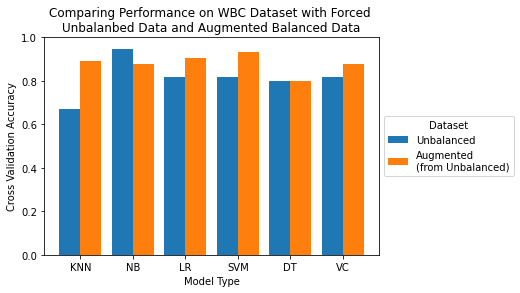

In [43]:
import matplotlib.pyplot as plt 
  
X_Vals = ['KNN','NB','LR','SVM', 'DT', 'VC']

aug = [np.mean(augKnnWBC), np.mean(augNbWBC), np.mean(augLrWBC),
        np.mean(augSvmWBC), np.mean(augDtWBC), np.mean(augVcWBC)]
reg = [np.mean(knnWBC), np.mean(nbWBC), np.mean(lrWBC),
        np.mean(svmWBC), np.mean(dtWBC), np.mean(vcWBC)]


  
X_axis = np.arange(len(X_Vals))


 
plt.bar(X_axis - 0.2, reg, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, aug, 0.4, label = 'Augmented\n(from Unbalanced)')
plt.xticks(X_axis, X_Vals)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0.0,1)
plt.title("Comparing Performance on WBC Dataset with Forced \nUnbalanbed Data and Augmented Balanced Data")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [44]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)

df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})



In [45]:
augKnnWDBC = []
augNbWDBC = []
augLrWDBC = []
augSvmWDBC = []
augDtWDBC = []
augVcWDBC = []
for i in range(10):
    X = df[cols[2:]]
    y = df[cols[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    numClassSamples = len(y_train) - sum(y_train)
    finalDataset = generateSyntheticDataset(X_train, y_train,  numBenign = numClassSamples, numMalig = numClassSamples)
    X_train = finalDataset[finalDataset.columns[:-1]]
    y_train = finalDataset[finalDataset.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)
    scores = trainModels(X_train, X_test, y_train, y_test)
    augKnnWDBC.append(scores[0])
    augNbWDBC.append(scores[1])
    augLrWDBC.append(scores[2])
    augSvmWDBC.append(scores[3])
    augDtWDBC.append(scores[4])
    augVcWDBC.append(scores[5])
    print('Iteration: {}'.format(i))


print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(augKnnWDBC), max(augKnnWDBC), sum(augKnnWDBC)/len(augKnnWDBC)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(augNbWDBC), max(augNbWDBC), sum(augNbWDBC)/len(augNbWDBC)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(augLrWDBC), max(augLrWDBC), sum(augLrWDBC)/len(augLrWDBC)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(augSvmWDBC), max(augSvmWDBC), sum(augSvmWDBC)/len(augSvmWDBC)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(augDtWDBC), max(augDtWDBC), sum(augDtWDBC)/len(augDtWDBC)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))
print('VC  - Min: {}, Max: {}, Avg: {}'.format(min(augVcWDBC), max(augVcWDBC), sum(augVcWDBC)/len(augVcWDBC)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))



Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
KNN - Min: 0.7368421052631579, Max: 0.9385964912280702, Avg: 0.8526315789473685
NB  - Min: 0.3508771929824561, Max: 0.6666666666666666, Avg: 0.5535087719298246
LR  - Min: 0.7368421052631579, Max: 0.8771929824561403, Avg: 0.8149122807017543
SVM - Min: 0.7719298245614035, Max: 0.9649122807017544, Avg: 0.8947368421052632
DT  - Min: 0.5701754385964912, Max: 0.8947368421052632, Avg: 0.7526315789473683
VC  - Min: 0.6403508771929824, Max: 0.8859649122807017, Avg: 0.7736842105263158


In [46]:
knnWDBC = []
nbWDBC = []
lrWDBC = []
svmWDBC = []
dtWDBC = []
vcWDBC = []
for i in range(10):
    X = df[cols[2:]]
    y = df[cols[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    scores = trainModels(X_train, X_test, y_train, y_test)
    knnWDBC.append(scores[0])
    nbWDBC.append(scores[1])
    lrWDBC.append(scores[2])
    svmWDBC.append(scores[3])
    dtWDBC.append(scores[4])
    vcWDBC.append(scores[5])
    print('Iteration: {}'.format(i))



print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(knnWDBC), max(knnWDBC), sum(knnWDBC)/len(knnWDBC)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(nbWDBC), max(nbWDBC), sum(nbWDBC)/len(nbWDBC)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(lrWDBC), max(lrWDBC), sum(lrWDBC)/len(lrWDBC)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(svmWDBC), max(svmWDBC), sum(svmWDBC)/len(svmWDBC)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(dtWDBC), max(dtWDBC), sum(dtWDBC)/len(dtWDBC)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))
print('VC  - Min: {}, Max: {}, Avg: {}'.format(min(vcWDBC), max(vcWDBC), sum(vcWDBC)/len(vcWDBC)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
KNN - Min: 0.6578947368421053, Max: 0.8947368421052632, Avg: 0.8140350877192983
NB  - Min: 0.34210526315789475, Max: 0.6666666666666666, Avg: 0.531578947368421
LR  - Min: 0.7719298245614035, Max: 0.9473684210526315, Avg: 0.8657894736842104
SVM - Min: 0.8157894736842105, Max: 0.956140350877193, Avg: 0.8991228070175439
DT  - Min: 0.7631578947368421, Max: 0.9035087719298246, Avg: 0.8464912280701753
VC  - Min: 0.7719298245614035, Max: 0.9210526315789473, Avg: 0.85


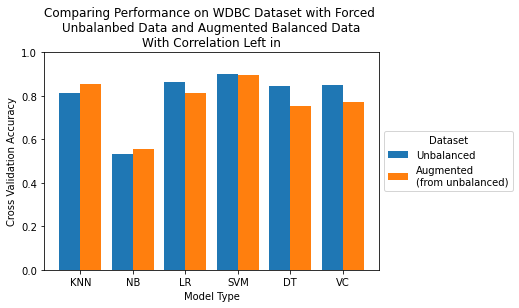

In [48]:
import matplotlib.pyplot as plt 
  
X_Vals = ['KNN','NB','LR','SVM', 'DT', 'VC' ]

aug = [np.mean(augKnnWDBC), np.mean(augNbWDBC), np.mean(augLrWDBC),
        np.mean(augSvmWDBC), np.mean(augDtWDBC), np.mean(augVcWDBC)]
reg = [np.mean(knnWDBC), np.mean(nbWDBC), np.mean(lrWDBC),
        np.mean(svmWDBC), np.mean(dtWDBC), np.mean(vcWDBC)]

  
X_axis = np.arange(len(X_Vals))
  
plt.bar(X_axis - 0.2, reg, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, aug, 0.4, label = 'Augmented\n(from unbalanced)')
  
plt.xticks(X_axis, X_Vals)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0.0,1)
plt.title("Comparing Performance on WDBC Dataset with Forced \nUnbalanbed Data and Augmented Balanced Data\nWith Correlation Left in")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [49]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)

df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})
#Columns Identified by Correlation Matrix
#When Columns were correlated, that which was most correlated with the target variable (Diagnosis)
#Was Kept
colsInUse = ['ID', 'Diagnosis', 'texture', 'smoothness', 'symmetry', 'fractal_dimension', 
                'radius_SE', 'texture_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
                'texture_MAX', 'perimeter_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']

df = df[colsInUse]



In [51]:
augKnnWDBC_Stripped = []
augNbWDBC_Stripped = []
augLrWDBC_Stripped = []
augSvmWDBC_Stripped = []
augDtWDBC_Stripped = []
augVcWDBC_Stripped = []
for i in range(10):
    X = df[colsInUse[2:]]
    y = df[colsInUse[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    numClassSamples = len(y_train) - sum(y_train)
    finalDataset = generateSyntheticDataset(X_train, y_train,  numBenign = numClassSamples, numMalig = numClassSamples)
    X_train = finalDataset[finalDataset.columns[:-1]]
    y_train = finalDataset[finalDataset.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)
    scores = trainModels(X_train, X_test, y_train, y_test)
    augKnnWDBC_Stripped.append(scores[0])
    augNbWDBC_Stripped.append(scores[1])
    augLrWDBC_Stripped.append(scores[2])
    augSvmWDBC_Stripped.append(scores[3])
    augDtWDBC_Stripped.append(scores[4])
    augVcWDBC_Stripped.append(scores[5])
    print('Iteration: {}'.format(i))


print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(augKnnWDBC_Stripped), max(augKnnWDBC_Stripped), sum(augKnnWDBC_Stripped)/len(augKnnWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(augNbWDBC_Stripped), max(augNbWDBC_Stripped), sum(augNbWDBC_Stripped)/len(augNbWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(augLrWDBC_Stripped), max(augLrWDBC_Stripped), sum(augLrWDBC_Stripped)/len(augLrWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(augSvmWDBC_Stripped), max(augSvmWDBC_Stripped), sum(augSvmWDBC_Stripped)/len(augSvmWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(augDtWDBC_Stripped), max(augDtWDBC_Stripped), sum(augDtWDBC_Stripped)/len(augDtWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))
print('VC  - Min: {}, Max: {}, Avg: {}'.format(min(augVcWDBC_Stripped), max(augVcWDBC_Stripped), sum(augVcWDBC_Stripped)/len(augVcWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
KNN - Min: 0.631578947368421, Max: 0.9473684210526315, Avg: 0.8596491228070174
NB  - Min: 0.38596491228070173, Max: 0.6842105263157895, Avg: 0.5754385964912281
LR  - Min: 0.8157894736842105, Max: 0.9385964912280702, Avg: 0.8973684210526315
SVM - Min: 0.7719298245614035, Max: 0.9473684210526315, Avg: 0.8833333333333335
DT  - Min: 0.3333333333333333, Max: 0.9122807017543859, Avg: 0.5578947368421052
VC  - Min: 0.5964912280701754, Max: 0.9035087719298246, Avg: 0.7464912280701754


In [52]:
knnWDBC_Stripped = []
nbWDBC_Stripped = []
lrWDBC_Stripped = []
svmWDBC_Stripped = []
dtWDBC_Stripped = []
vcWDBC_Stripped = []
for i in range(10):
    X = df[colsInUse[2:]]
    y = df[colsInUse[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    subSample = pd.DataFrame(subsample(X_train, y_train, 20000, 5))
    X_train = subSample[subSample.columns[:-1]]
    y_train = subSample[subSample.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    scores = trainModels(X_train, X_test, y_train, y_test)
    knnWDBC_Stripped.append(scores[0])
    nbWDBC_Stripped.append(scores[1])
    lrWDBC_Stripped.append(scores[2])
    svmWDBC_Stripped.append(scores[3])
    dtWDBC_Stripped.append(scores[4])
    vcWDBC_Stripped.append(scores[5])
    print('Iteration: {}'.format(i))



print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(knnWDBC_Stripped), max(knnWDBC_Stripped), sum(knnWDBC_Stripped)/len(knnWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(nbWDBC_Stripped), max(nbWDBC_Stripped), sum(nbWDBC_Stripped)/len(nbWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(lrWDBC_Stripped), max(lrWDBC_Stripped), sum(lrWDBC_Stripped)/len(lrWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(svmWDBC_Stripped), max(svmWDBC_Stripped), sum(svmWDBC_Stripped)/len(svmWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(dtWDBC_Stripped), max(dtWDBC_Stripped), sum(dtWDBC_Stripped)/len(dtWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))
print('VC  - Min: {}, Max: {}, Avg: {}'.format(min(vcWDBC_Stripped), max(vcWDBC_Stripped), sum(vcWDBC_Stripped)/len(vcWDBC_Stripped)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
KNN - Min: 0.7982456140350878, Max: 0.9298245614035088, Avg: 0.8543859649122807
NB  - Min: 0.34210526315789475, Max: 0.6578947368421053, Avg: 0.5236842105263158
LR  - Min: 0.8859649122807017, Max: 0.9385964912280702, Avg: 0.9070175438596492
SVM - Min: 0.8508771929824561, Max: 0.9473684210526315, Avg: 0.8947368421052632
DT  - Min: 0.7719298245614035, Max: 0.9035087719298246, Avg: 0.8605263157894736
VC  - Min: 0.7719298245614035, Max: 0.9035087719298246, Avg: 0.8614035087719298


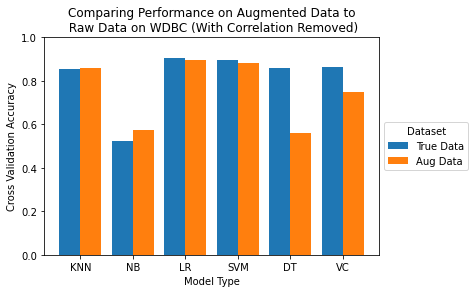

In [55]:
X = ['KNN','NB','LR','SVM', 'DT', 'VC' ]

aug = [np.mean(augKnnWDBC_Stripped), np.mean(augNbWDBC_Stripped), np.mean(augLrWDBC_Stripped),
        np.mean(augSvmWDBC_Stripped), np.mean(augDtWDBC_Stripped), np.mean(augVcWDBC_Stripped)]
reg = [np.mean(knnWDBC_Stripped), np.mean(nbWDBC_Stripped), np.mean(lrWDBC_Stripped),
        np.mean(svmWDBC_Stripped), np.mean(dtWDBC_Stripped), np.mean(vcWDBC_Stripped)]

Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, reg, 0.4, label = 'True Data')
plt.bar(X_axis + 0.2, aug, 0.4, label = 'Aug Data')
  
plt.xticks(X_axis, X)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0,1)
plt.title("Comparing Performance on Augmented Data to\n Raw Data on WDBC (With Correlation Removed)")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()